# Car Sales
download: [link](https://www.kaggle.com/datasets/missionjee/car-sales-report)

In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
df = pd.read_csv('Car Sales.xlsx - car_data.csv')
df = df.drop(['Car_id', 'Customer Name', 'Phone', 'Dealer_Region'], axis=1)
df['Date'] = pd.to_datetime(df['Date'])

In [198]:
df.describe()

,Date,Annual Income,Price ($)
count,23906,2.390600e+04,23906.000000
mean,2023-03-01 14:28:10.822387456,8.308403e+05,28090.247846
min,2022-01-02 00:00:00,1.008000e+04,1200.000000
25%,2022-09-20 00:00:00,3.860000e+05,18001.000000
50%,2023-03-13 00:00:00,7.350000e+05,23000.000000
75%,2023-09-08 00:00:00,1.175750e+06,34000.000000
max,2023-12-31 00:00:00,1.120000e+07,85800.000000
std,NaN,7.200064e+05,14788.687608


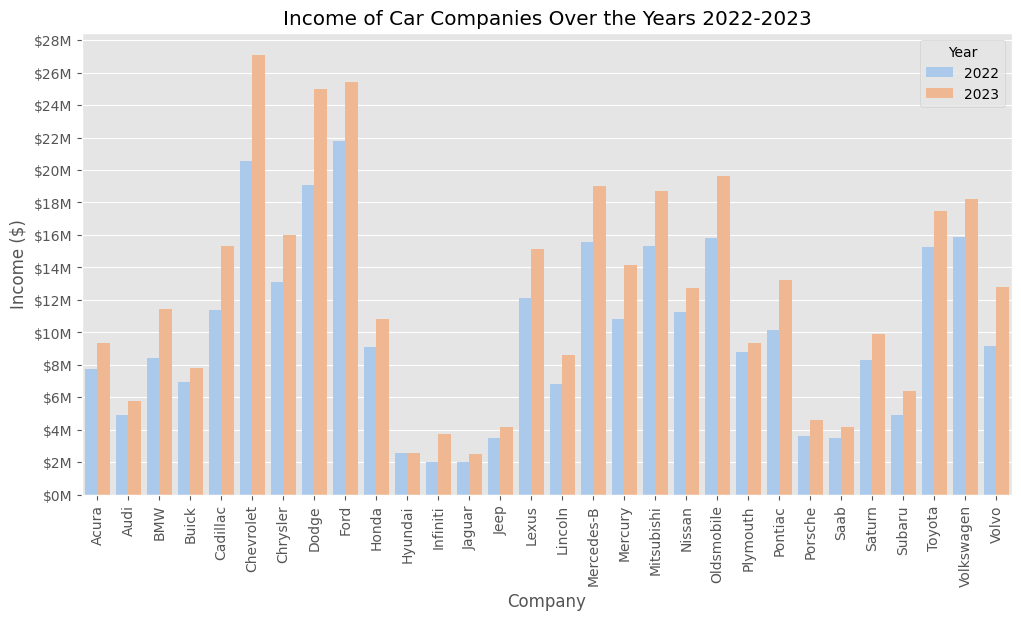

In [199]:
company_income = df.copy()
company_income['Year'] = company_income['Date'].dt.year
company_income = company_income.groupby(['Company', 'Year']).sum('Price ($)').reset_index()
company_income = company_income.melt(id_vars=['Company', 'Year'], value_vars=['Price ($)'], var_name='Income', value_name='Income ($)')

plt.figure(figsize=(12, 6))
sns.barplot(x='Company', y='Income ($)', hue='Year', data=company_income, palette='pastel')
plt.title('Income of Car Companies Over the Years 2022-2023')
plt.xticks(rotation=90)
plt.yticks(range(0, 30000000, 2000000), [f'${i}M' for i in range(0, 30, 2)])
plt.show()

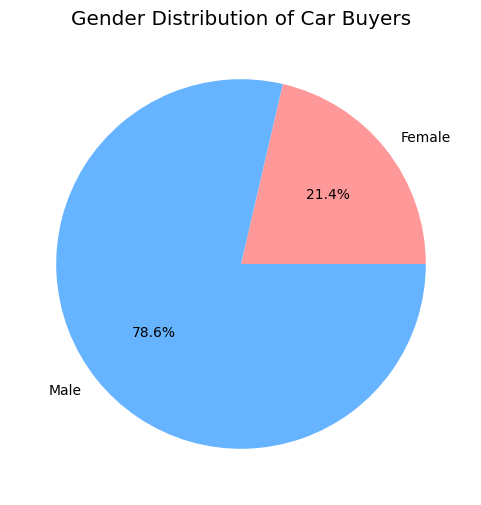

In [200]:
gender_df = df.copy().groupby('Gender').size().reset_index(name='Count')
plt.figure(figsize=(6, 6))
plt.pie('Count', labels='Gender', data=gender_df, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'])
plt.title('Gender Distribution of Car Buyers')
plt.show()

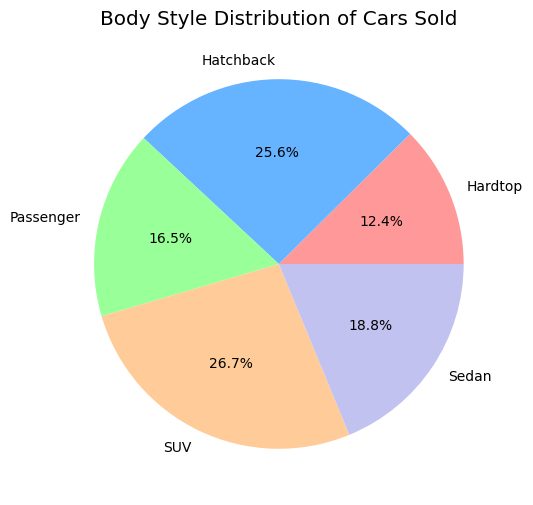

In [201]:
body_df = df.copy().groupby('Body Style').size().reset_index(name='Count')
plt.figure(figsize=(6, 6))
plt.pie('Count', labels='Body Style', data=body_df, autopct='%1.1f%%', colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0'])
plt.title('Body Style Distribution of Cars Sold')
plt.show()

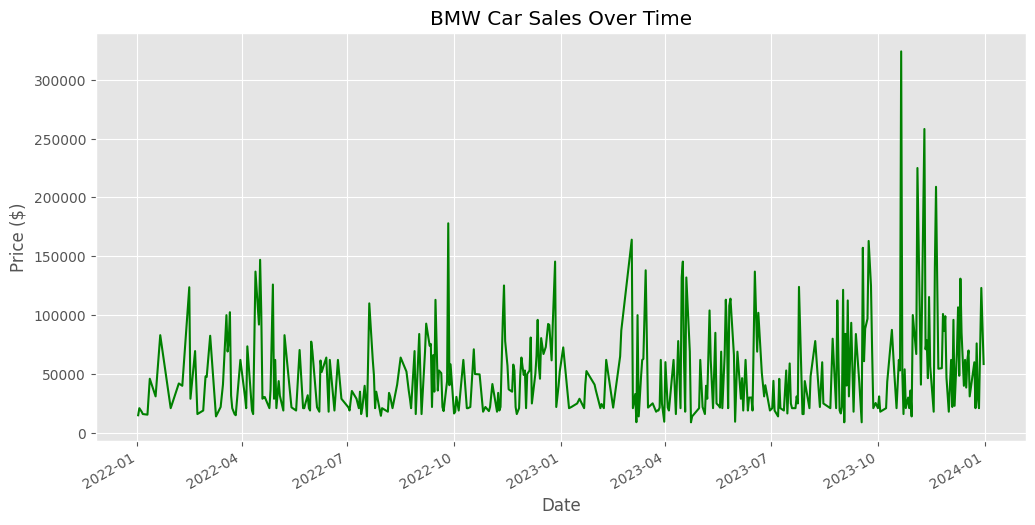

In [202]:
bmw_df = df.copy().loc[df['Company'] == 'BMW']
bmw_df = bmw_df.groupby('Date').sum('Price ($)').reset_index()

bmw_df.plot.line(x='Date', y='Price ($)', figsize=(12, 6), title='BMW Car Sales Over Time', color='green')
plt.legend().set_visible(False)
plt.ylabel('Price ($)')
plt.show()

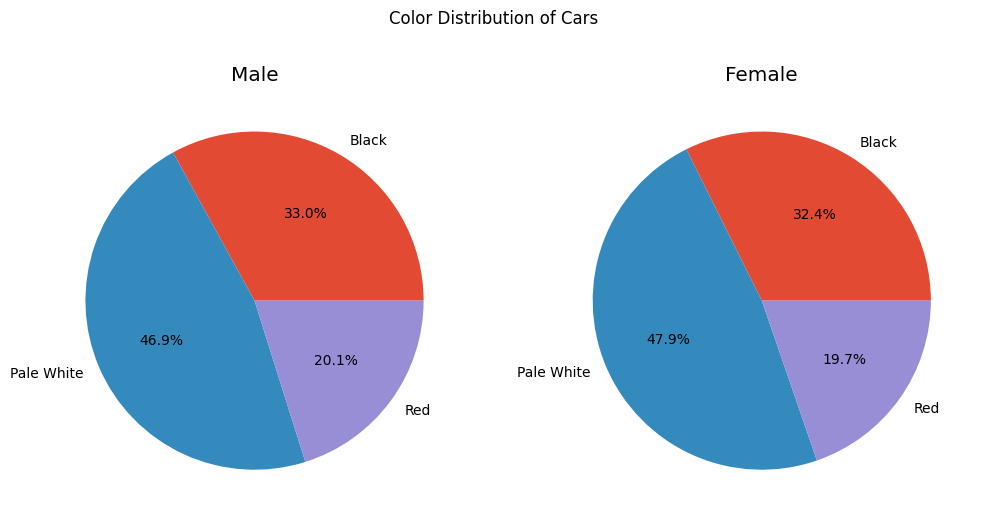

In [203]:
# color picked by gender
color_df = df.copy()
color_df = color_df.groupby(['Gender', 'Color']).size().reset_index(name='Colors')

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
pie1 = color_df.loc[color_df['Gender'] == 'Male'].plot.pie(y='Colors', labels=color_df['Color'], autopct='%1.1f%%', ax=ax[0], title='Male')
pie2 = color_df.loc[color_df['Gender'] == 'Female'].plot.pie(y='Colors', labels=color_df['Color'], autopct='%1.1f%%', ax=ax[1], title='Female')
pie1.set_ylabel('')
pie2.set_ylabel('')
pie1.legend().set_visible(False)
pie2.legend().set_visible(False)
fig.suptitle('Color Distribution of Cars')
plt.show()

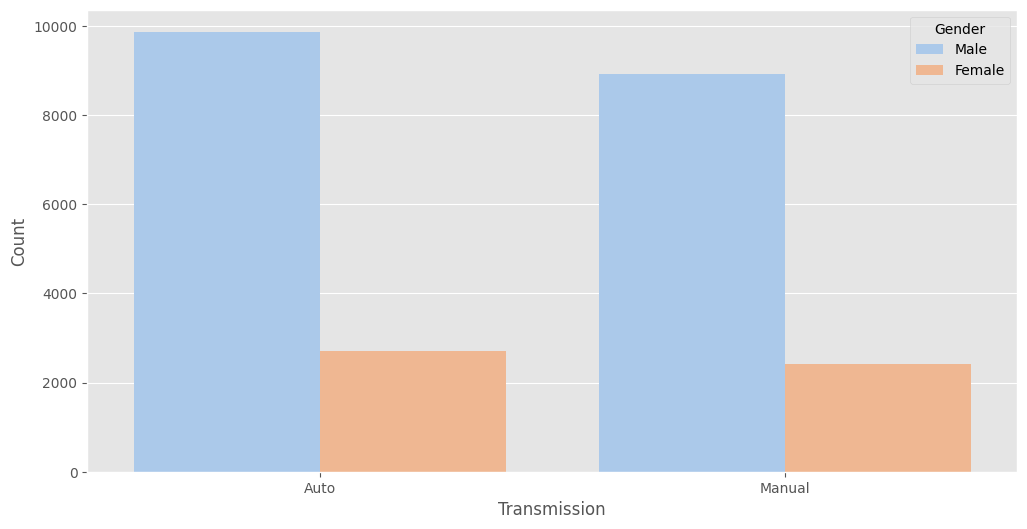

In [205]:
# Transmission picked by gender
trans_gender = df.copy()
trans_gender = trans_gender.groupby(['Gender', 'Transmission']).size().reset_index(name='Count')
trans_gender = trans_gender.melt(id_vars=['Transmission', 'Gender'], value_vars=['Count'], var_name='variable', value_name='value')
trans_gender.sort_values(by='Gender', ascending=False, inplace=True)

plt.figure(figsize=(12, 6))
sns.barplot(x='Transmission', y='value', hue='Gender', data=trans_gender, palette='pastel')
plt.ylabel('Count')
plt.show()